In [1]:

#Q1) Find the correlation between weight and height and covariance matrix and draw scatter plot and heatmap

In [8]:
!pip install seaborn 
!pip install matplotlib.pyplot

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 7.1 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.8 MB 3.1 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/7.8 MB 3.0 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 2.5 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/7.8 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 3.4/7.8 MB 2.5 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 2.6 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/7.8 MB 3.0 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 2.9 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 3.0 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 2.9 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


In [9]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt



Matplotlib is building the font cache; this may take a moment.


In [13]:
df = pd.read_csv('../../dataset/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [15]:
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']


In [18]:
overall_corr = df[['Height','Weight']].corr()
male_corr = male_df[['Height','Weight']].corr()
female_corr = female_df[['Height','Weight']].corr()

<Axes: xlabel='Height', ylabel='Weight'>

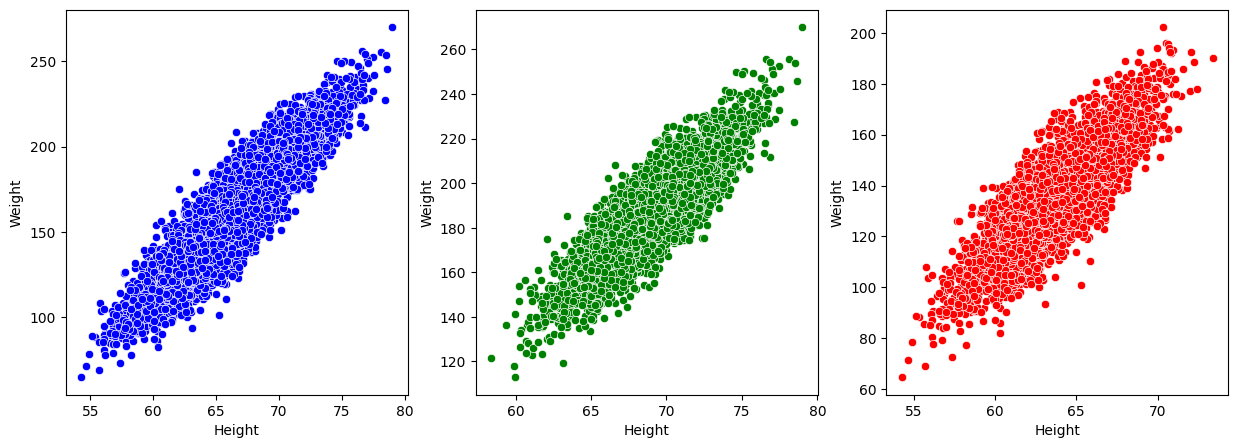

In [36]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x='Height',y='Weight',data=df,ax=axes[0],color='blue')
#axes[0].set_title(f"Overall correlation: {overall_corr:.2f}")

sns.scatterplot(x='Height', y='Weight', data=male_df, ax=axes[1], color='green')

sns.scatterplot(x='Height', y='Weight', data=female_df, ax=axes[2], color='red')

Text(0.5, 1.0, 'Overall correlation')

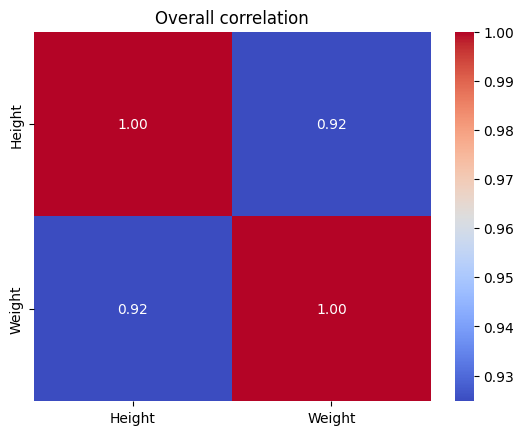

In [49]:
#fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.heatmap(data=overall_corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Overall correlation')

<Axes: >

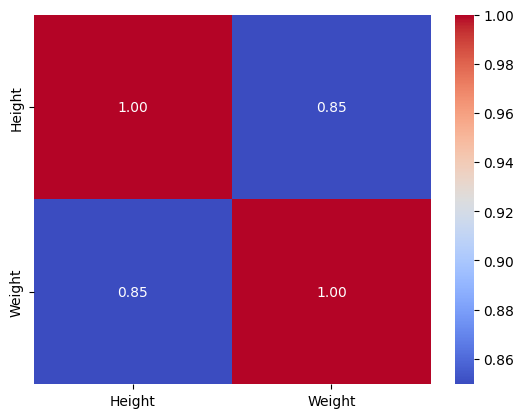

In [48]:
# heat map for female correlation
sns.heatmap(data=female_corr,annot=True,cmap='coolwarm',fmt='.2f')

<Axes: >

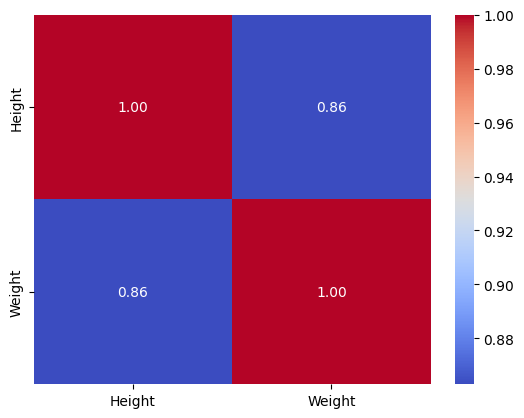

In [47]:
sns.heatmap(data=male_corr,annot=True,cmap='coolwarm',fmt='.2f')

Q2) combine the marathon result data set and calculate correlation between pace and offical time and draw scatterplot and heatmap

In [50]:
df_2015 = pd.read_csv('../../dataset/marathon_results_2015.csv')
df_2016 = pd.read_csv('../../dataset/marathon_results_2016.csv')
df_2017 = pd.read_csv('../../dataset/marathon_results_2017.csv')



In [57]:
merged_df = pd.concat([df_2015,df_2016,df_2017])


0        [0, 04, 56]
1        [0, 04, 58]
2        [0, 04, 59]
3        [0, 05, 00]
4        [0, 05, 00]
            ...     
26405    [0, 16, 24]
26406    [0, 16, 40]
26407    [0, 16, 47]
26408    [0, 16, 49]
26409    [0, 18, 15]
Name: Pace, Length: 79638, dtype: object

In [64]:
##seprate the pace and officail time into hours min seconds and convert it inot seconds
## first do for official column the change the values for pace
merged_df[['Hour','Minutes','Seconds']] = merged_df['Pace'].str.split(":",expand=True).astype(int)
merged_df['Pace_time_sec'] = merged_df['Hour'] * 60 * 60 + merged_df['Minutes'] * 60 + merged_df['Seconds'] 

In [66]:
merged_df.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division', 'Unnamed: 8', 'Hour', 'Minutes', 'Seconds',
       'Official_time_sec', 'Pace_time_sec'],
      dtype='object')

In [68]:
corr = merged_df[['Pace_time_sec','Official_time_sec']].corr()

In [69]:
corr

,Pace_time_sec,Official_time_sec
Pace_time_sec,1.000000,0.999667
Official_time_sec,0.999667,1.000000


Text(0.5, 1.0, 'pace and offical time correlation')

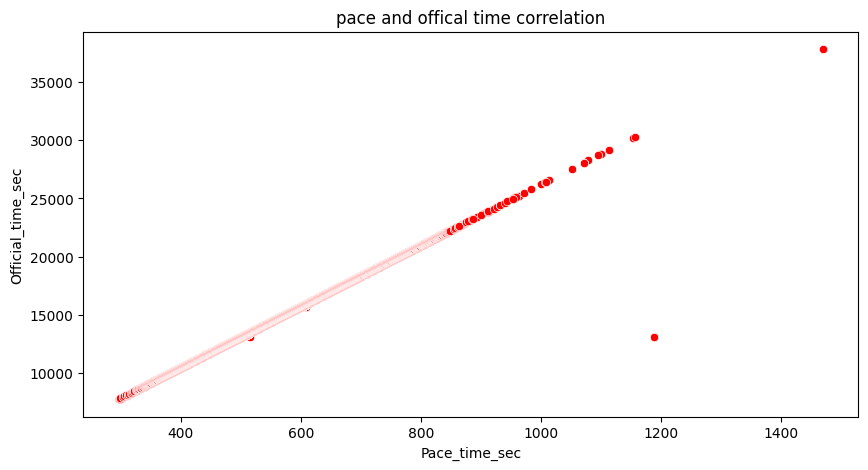

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=merged_df,x='Pace_time_sec',y='Official_time_sec',color='red')
plt.title('pace and offical time correlation')

<Axes: >

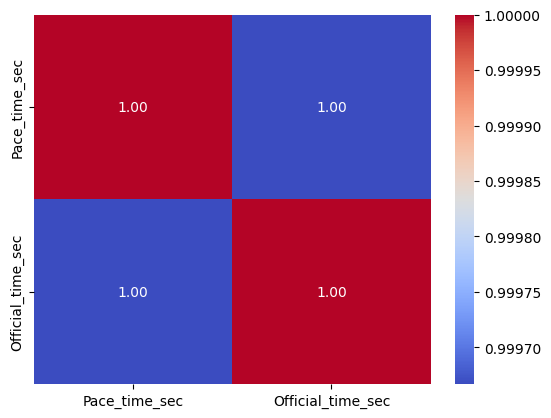

In [78]:
sns.heatmap(data=corr,annot=True,fmt='.2f',cmap='coolwarm')

Q3) find the correlation between bitcoin,gold,s&p500 and bitcoin and gold , bitcoin and gold


In [79]:
stock_df = pd.read_csv('../../dataset/SP500 oil gold bitcoin.csv')

In [80]:
stock_df.head()

,Date,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
0,2010-07-18,0.1,75.37,76.01,1188.0,1064.88
1,2010-07-19,0.1,75.62,76.54,1181.7,1071.25
2,2010-07-20,0.1,76.22,77.44,1191.5,1083.48
3,2010-07-21,0.1,75.37,76.56,1191.6,1069.59
4,2010-07-22,0.1,77.82,79.30,1195.5,1093.67


In [88]:
stock_df = stock_df[['BITCOIN','Gold','S&P500']].astype(int)


,BITCOIN,Gold,S&P500
0,0,1188,1064
1,0,1181,1071
2,0,1191,1083
3,0,1191,1069
4,0,1195,1093
...,...,...,...
4349,22157,1813,3735
4350,22577,1819,3789
4351,20386,1849,3666
4352,20444,1840,3674


In [89]:
all_stock_corr = stock_df[['BITCOIN','Gold','S&P500']].corr()
bit_gold_corr = stock_df[['BITCOIN','Gold']].corr()
bit_sp500_corr = stock_df[['BITCOIN','S&P500']].corr()

<Axes: xlabel='BITCOIN', ylabel='S&P500'>

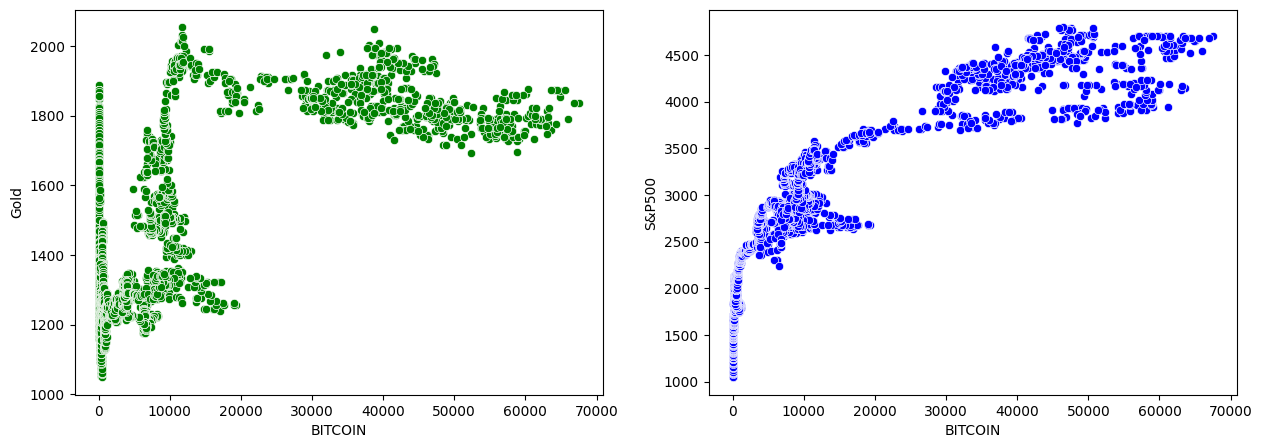

In [95]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=stock_df,x='BITCOIN',y='Gold',color='green',ax=axes[0])
sns.scatterplot(data=stock_df,x='BITCOIN',y='S&P500',color='blue',ax=axes[1])

<Axes: >

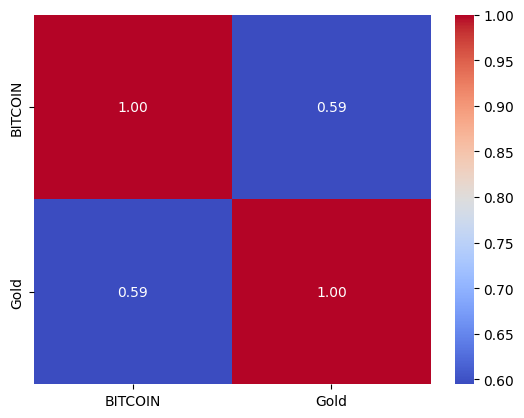

In [97]:
sns.heatmap(data=bit_gold_corr,annot=True,cmap='coolwarm',fmt='.2f')

<Axes: >

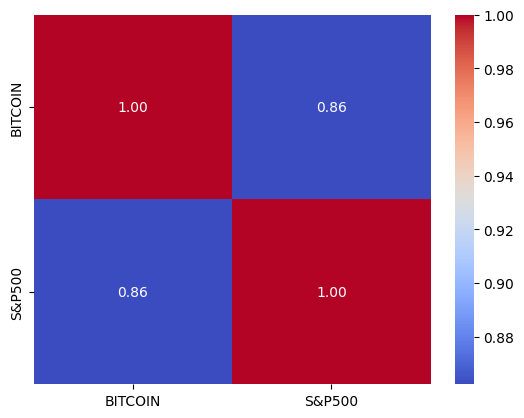

In [98]:
sns.heatmap(data=bit_sp500_corr,annot=True,cmap='coolwarm',fmt='.2f')